In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Load dataset and divide them into train : test =8:2
#df1=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-00s.csv')
#df2=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-10s.csv')
#DATA=pd.concat([df1,df2])
#DATA=DATA.sample(frac=1.0)
#DATA.reset_index(drop=True, inplace=True)#shuffle the dataset
#DATA.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/data set with missing data.csv")
#DATA_numerical=DATA.drop(['track'], axis=1)
#DATA_numerical=DATA_numerical.drop(['artist','uri'], axis=1)
#DATA_numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.626,0.6700,7,-5.381,1,0.0534,0.318000,0.000000,0.0429,0.5230,73.422,223253,4,16.93477,11,1
1,0.509,0.9420,11,-6.899,1,0.0628,0.000639,0.882000,0.0788,0.1630,169.960,460080,4,34.78597,12,0
2,0.657,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,0.1140,0.2980,103.973,232533,4,26.41190,13,1
3,0.661,0.8090,7,-11.885,0,0.0399,0.002660,0.768000,0.1040,0.2340,130.006,428434,4,44.83827,15,0
4,0.639,0.7090,3,-6.386,0,0.3320,0.191000,0.000000,0.0758,0.3760,104.964,229493,4,19.52692,11,1
5,0.601,0.6990,10,-6.505,1,0.0550,0.944000,0.509000,0.2940,0.9300,111.880,225280,4,34.78227,11,0
6,0.434,0.9590,5,-2.016,1,0.0572,0.017600,0.093800,0.2440,0.3670,90.039,258907,4,23.38661,10,0
7,0.418,0.5490,2,-10.752,1,0.0353,0.172000,0.000055,0.0540,0.3610,113.620,176040,3,20.81374,9,0
8,0.817,0.6830,10,-6.590,1,0.1390,0.214000,0.000009,0.0798,0.8150,119.053,188911,4,65.90026,5,0
9,0.451,0.9510,1,-3.754,1,0.0645,0.000380,0.000002,0.2610,0.4420,162.065,213933,4,24.16702,10,1


In [2]:
DATA_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/data set with missing data.csv",
                      encoding='unicode_escape')
DATA_miss

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,Bow Chicka Wow Wow,Mike Posner Featuring Lil Wayne,spotify:track:7neVcKsbivjMDIkdfoao5m,0.626,0.6700,7,-5.381,1,0.0534,0.318000,0.000000,0.0429,0.5230,73.422,223253,4,16.93477,11,1
1,1,Serious Hardcore - Original Mix,Ham,spotify:track:6mGnxmegYYJA2TkhXCbOkb,0.509,0.9420,11,-6.899,1,0.0628,0.000639,0.882000,0.0788,0.1630,169.960,460080,4,34.78597,12,0
2,2,Hey There Delilah,Plain White T's,spotify:track:4RCWB3V8V0dignt99LZ8vH,0.657,0.2910,2,-10.572,1,0.0293,0.872000,0.000000,0.1140,0.2980,103.973,232533,4,26.41190,13,1
3,3,Black Metal Phase (Club Revision),Darcy Baylis,spotify:track:5ZSGYf1INi1AWESnXYqVjw,0.661,0.8090,7,-11.885,0,0.0399,0.002660,0.768000,0.1040,0.2340,130.006,428434,4,44.83827,15,0
4,4,Get Buck In Here,"DJ Felli Fel Featuring Diddy, Akon, Ludacris &...",spotify:track:5zN3VFmNhdOKxRElarvVq5,0.639,0.7090,3,-6.386,0,0.3320,0.191000,0.000000,0.0758,0.3760,104.964,229493,4,19.52692,11,1
5,5,Jean And Dinah,Mighty Sparrow,spotify:track:2XMDzJEPmwwAP3sltBmzY5,0.601,0.6990,10,-6.505,1,0.0550,0.944000,0.509000,0.2940,0.9300,111.880,225280,4,34.78227,11,0
6,6,We Don't Live There Anymore,Millionaire,spotify:track:28uHOWKXQXluSLNvlnySWC,0.434,0.9590,5,-2.016,1,0.0572,0.017600,0.093800,0.2440,0.3670,90.039,258907,4,23.38661,10,0
7,7,Would You?,Richard Swift,spotify:track:0E9qk7eTgy4JIk3JQgeWWz,0.418,0.5490,2,-10.752,1,0.0353,0.172000,0.000055,0.0540,0.3610,113.620,176040,3,20.81374,9,0
8,8,Geraldines Routine,Tape Five,spotify:track:42l9bIPPT5555p3KeY83y2,0.817,0.6830,10,-6.590,1,0.1390,0.214000,0.000009,0.0798,0.8150,119.053,188911,4,65.90026,5,0
9,9,Somewhere I Belong,Linkin Park,spotify:track:3agtg0x11wPvLIWkYR39nZ,0.451,0.9510,1,-3.754,1,0.0645,0.000380,0.000002,0.2610,0.4420,162.065,213933,4,24.16702,10,1


In [3]:
DATA_miss.isnull().sum()

Unnamed: 0             0
track                  0
artist                77
uri                   98
danceability        1492
energy                 0
key                    0
loudness               0
mode                   0
speechiness           46
acousticness         648
instrumentalness      50
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
chorus_hit             0
sections               0
target                 0
dtype: int64

In [14]:
#DATA_miss=DATA_miss.sample(frac=1.0)
#DATA_miss.reset_index(drop=True, inplace=True)#shuffle the dataset
#train_set_miss=DATA_miss.loc[0:9816]
#test_set_miss=DATA_miss.loc[9817:12270]
#test_set_miss.reset_index(drop=True, inplace=True)
#print("split the dataset into the proportion train:test=8:2 ")
#print("size of train set=",train_set_miss.shape)
#print("size of test set=",test_set_miss.shape)
#df=test_set_miss.loc[test_set_miss['target'].isin(['1'])]
#print("the target is 1 in test",df.shape)
#test_set_miss.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set_miss.csv")
#train_set_miss.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set_miss.csv")
#print("Save train and test dataset successfully!")

split the dataset into the proportion train:test=8:2 
size of train set= (9817, 20)
size of test set= (2437, 20)
the target is 1 in test (1236, 20)
Save train and test dataset successfully!


In [4]:
train_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set_miss.csv",
                      encoding='unicode_escape')
train_set_miss=train_set_miss.drop(["Unnamed: 0"],axis=1)
test_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set_miss.csv",
                     encoding='unicode_escape').drop(["Unnamed: 0"],axis=1)
print("size of train set=",train_set_miss.shape)
print("size of test set=",test_set_miss.shape)
#train_set

size of train set= (9817, 20)
size of test set= (2437, 20)


In [5]:
def MissValue(data):
    miss_ratio = (DATA_miss.isnull().sum() / len(DATA_miss)) * 100
    miss_ratio = miss_ratio.sort_values(ascending=False)
    AllNull_train_ratio = miss_ratio.drop(miss_ratio[miss_ratio == 0].index)
    missing_train_ratio = pd.DataFrame({'Missing train data ratio': AllNull_train_ratio})
    print(missing_train_ratio)

    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')  # ratate direction of words for each feature
    sns.barplot(x=miss_ratio.index, y=miss_ratio)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent', fontsize=15)
    plt.title('Percentage of Missing Data', fontsize=15)
    plt.show()

                  Missing train data ratio
danceability                     12.175616
acousticness                      5.288069
uri                               0.799739
artist                            0.628366
instrumentalness                  0.408030
speechiness                       0.375388


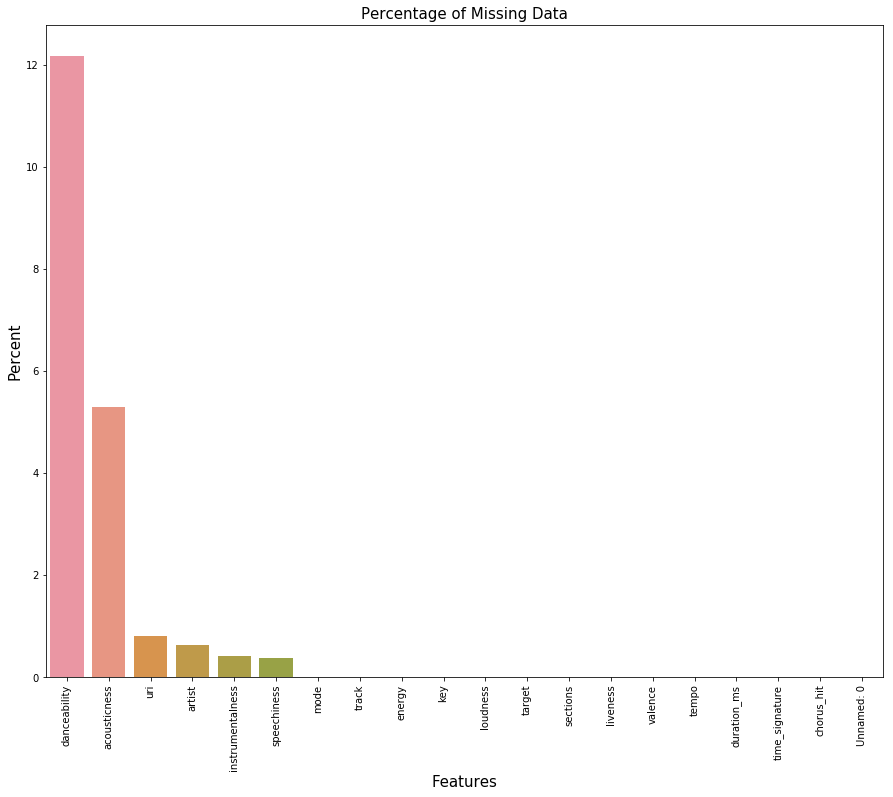

In [6]:
MissValue(DATA_miss)

                  Missing train data ratio
danceability                     12.132016
acousticness                      5.225629
uri                               0.784354
artist                            0.621371
speechiness                       0.407456
instrumentalness                  0.397270


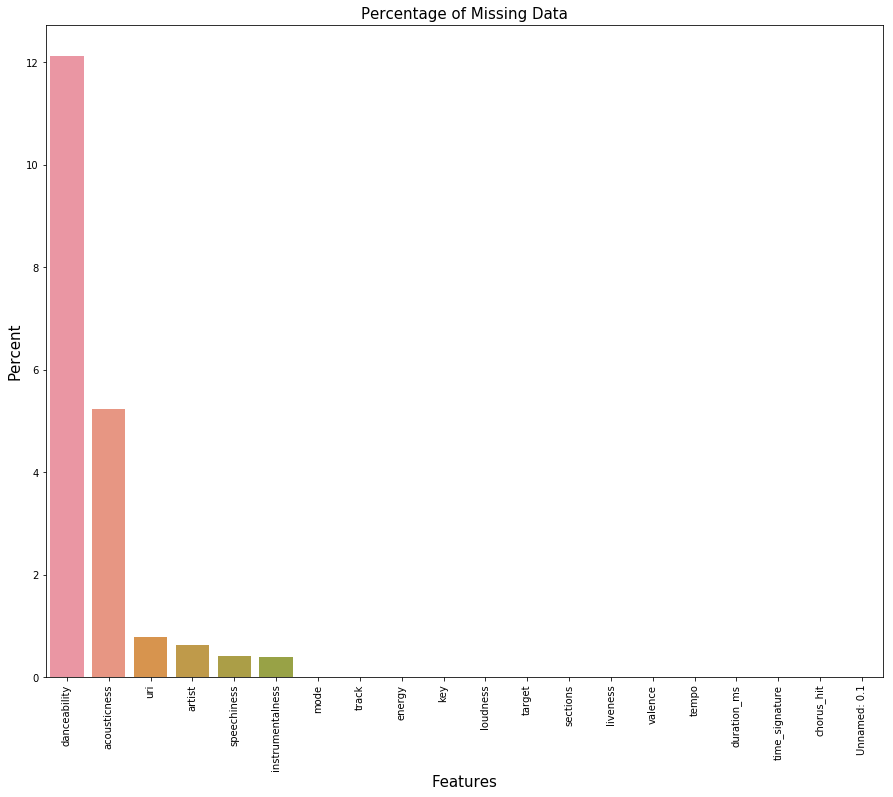

In [7]:
miss_ratio = (train_set_miss.isnull().sum() / len(train_set_miss)) * 100
miss_ratio = miss_ratio.sort_values(ascending=False)
AllNull_train_ratio = miss_ratio.drop(miss_ratio[miss_ratio == 0].index)
missing_train_ratio = pd.DataFrame({'Missing train data ratio': AllNull_train_ratio})
print(missing_train_ratio)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')  # ratate direction of words for each feature
sns.barplot(x=miss_ratio.index, y=miss_ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('Percentage of Missing Data', fontsize=15)
plt.show()

In [56]:
#delete "uri and artist"
train_miss_numerical=train_set_miss.drop(['track'], axis=1)
train_miss_numerical=train_miss_numerical.drop(['artist','uri','Unnamed: 0.1'], axis=1)
train_miss_numerical.shape

(9817, 16)

In [57]:
test_miss_numerical=test_set_miss.drop(['track'], axis=1)
test_miss_numerical=test_miss_numerical.drop(['artist','uri','Unnamed: 0.1'], axis=1)
test_miss_numerical.shape

(2437, 16)

In [58]:
test_miss_numerical.isnull().sum()

danceability        301
energy                0
key                   0
loudness              0
mode                  0
speechiness           6
acousticness        135
instrumentalness     11
liveness              0
valence               0
tempo                 0
duration_ms           0
time_signature        0
chorus_hit            0
sections              0
target                0
dtype: int64

In [82]:
#for missing value in instrumentalness and acousticness - delete the datapoint
train_miss_numerical=train_miss_numerical.dropna(subset=['instrumentalness',
                                                        'speechiness'], how='any')
print(train_miss_numerical.shape)
test_miss_numerical=test_miss_numerical.dropna(subset=['instrumentalness',
                                                        'speechiness'], how='any')
print(test_miss_numerical.shape)

(9743, 16)
(2421, 16)


In [122]:
from sklearn.impute import KNNImputer
impute_knn=KNNImputer(n_neighbors=2)
impute_knn.fit(train_miss_numerical)
impute_knn_=impute_knn.transform(train_miss_numerical)
df_train=pd.DataFrame(impute_knn_)

df_train.columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit',
                    'sections','target']
df_train.shape

(9743, 16)

In [123]:
#impute_knn_test=KNNImputer(n_neighbors=2)
#impute_knn_test.fit(test_miss_numerical)
impute_knn_test=impute_knn.transform(test_miss_numerical)
df_test=pd.DataFrame(impute_knn_test)

df_test.columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit',
                    'sections','target']
df_test.shape

(2421, 16)

In [124]:
df_test.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [125]:
for column,row in df_train.iteritems():
    #print(index) # 输出列名
    df_column=df_train[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>df_column["25%"]-1.5*IQR)&(df_column["max"]<df_column["75%"]+1.5*IQR):
        print("No outlier for column", column)
    else:
        print("Have outlier of ",column)

Have outlier of  danceability
Have outlier of  energy
No outlier for column key
Have outlier of  loudness
No outlier for column mode
Have outlier of  speechiness
Have outlier of  acousticness
Have outlier of  instrumentalness
Have outlier of  liveness
No outlier for column valence
Have outlier of  tempo
Have outlier of  duration_ms
Have outlier of  time_signature
Have outlier of  chorus_hit
Have outlier of  sections
No outlier for column target


In [126]:
#deal with the outlier
df_danceability=df_train["danceability"].describe()
IQR_danceability=df_danceability["75%"]-df_danceability["25%"]
df_train["danceability"][df_train.danceability>df_danceability["75%"]+1.5*IQR_danceability]=df_danceability["75%"]+1.5*IQR_danceability
df_train["danceability"][df_train.danceability<df_danceability["25%"]-1.5*IQR_danceability]=df_danceability["25%"]-1.5*IQR_danceability

df_energy=df_train["energy"].describe()
IQR_energy=df_energy["75%"]-df_energy["25%"]
df_train["energy"][df_train.energy>df_energy["75%"]+1.5*IQR_energy]=df_energy["75%"]+1.5*IQR_energy
df_train["energy"][df_train.energy<df_energy["25%"]-1.5*IQR_energy]=df_energy["25%"]-1.5*IQR_energy

df_loudness=df_train["loudness"].describe()
IQR_loudness=df_loudness["75%"]-df_loudness["25%"]
df_train["loudness"][df_train.loudness>df_energy["75%"]+1.5*IQR_loudness]=df_loudness["75%"]+1.5*IQR_loudness
df_train["loudness"][df_train.loudness<df_energy["25%"]-1.5*IQR_loudness]=df_loudness["25%"]-1.5*IQR_loudness

df_speechiness=df_train["speechiness"].describe()
IQR_speechiness=df_speechiness["75%"]-df_speechiness["25%"]
df_train["speechiness"][df_train.speechiness
                                   >df_speechiness["75%"]+1.5*IQR_speechiness]=df_speechiness["75%"]+1.5*IQR_speechiness
df_train["speechiness"][df_train.speechiness
                                   <df_speechiness["25%"]-1.5*IQR_speechiness]=df_speechiness["25%"]-1.5*IQR_speechiness

df_acousticness=df_train["acousticness"].describe()
IQR_acousticness=df_acousticness["75%"]-df_acousticness["25%"]
df_train["acousticness"][df_train.acousticness
                                    >df_acousticness["75%"]+1.5*IQR_acousticness]=df_acousticness["75%"]+1.5*IQR_acousticness
df_train["acousticness"][df_train.acousticness
                                    <df_acousticness["25%"]-1.5*IQR_acousticness]=df_acousticness["25%"]-1.5*IQR_acousticness

df_instrumentalness=df_train["instrumentalness"].describe()
IQR_instrumentalness=df_instrumentalness["75%"]-df_instrumentalness["25%"]
df_train["instrumentalness"][df_train.instrumentalness
                              >df_instrumentalness["75%"]+1.5*IQR_instrumentalness]=df_instrumentalness["75%"]+1.5*IQR_instrumentalness
df_train["instrumentalness"][df_train.instrumentalness
                              <df_instrumentalness["25%"]-1.5*IQR_instrumentalness]=df_instrumentalness["25%"]-1.5*IQR_instrumentalness

df_liveness=df_train["liveness"].describe()
IQR_liveness=df_liveness["75%"]-df_liveness["25%"]
df_train["liveness"][df_train.liveness>df_liveness["75%"]+1.5*IQR_liveness]=df_liveness["75%"]+1.5*IQR_liveness
df_train["liveness"][df_train.liveness<df_liveness["25%"]-1.5*IQR_liveness]=df_liveness["25%"]-1.5*IQR_liveness

df_tempo=df_train["tempo"].describe()
IQR_tempo=df_tempo["75%"]-df_tempo["25%"]
df_train["tempo"][df_train.tempo>df_tempo["75%"]+1.5*IQR_tempo]=df_tempo["75%"]+1.5*IQR_tempo
df_train["tempo"][df_train.tempo<df_tempo["25%"]-1.5*IQR_tempo]=df_tempo["25%"]-1.5*IQR_tempo

df_duration_ms=df_train["duration_ms"].describe()
IQR_duration_ms=df_duration_ms["75%"]-df_duration_ms["25%"]
df_train["duration_ms"][df_train.duration_ms
                                   >df_duration_ms["75%"]+1.5*IQR_duration_ms]=df_duration_ms["75%"]+1.5*IQR_duration_ms
df_train["duration_ms"][df_train.duration_ms
                                   <df_duration_ms["25%"]-1.5*IQR_duration_ms]=df_duration_ms["25%"]-1.5*IQR_duration_ms

df_time_signature=df_train["time_signature"].describe()
IQR_time_signature=df_time_signature["75%"]-df_time_signature["25%"]
df_train["time_signature"][df_train.time_signature
                                      >df_time_signature["75%"]+1.5*IQR_time_signature]=df_time_signature["75%"]+1.5*IQR_time_signature
df_train["time_signature"][df_train.time_signature
                                      <df_time_signature["25%"]-1.5*IQR_time_signature]=df_time_signature["25%"]-1.5*IQR_time_signature

df_chorus_hit=df_train["chorus_hit"].describe()
IQR_chorus_hit=df_chorus_hit["75%"]-df_chorus_hit["25%"]
df_train["chorus_hit"][df_train.chorus_hit
                                  >df_chorus_hit["75%"]+1.5*IQR_chorus_hit]=df_chorus_hit["75%"]+1.5*IQR_chorus_hit
df_train["chorus_hit"][df_train.chorus_hit
                                  <df_chorus_hit["25%"]-1.5*IQR_chorus_hit]=df_chorus_hit["25%"]-1.5*IQR_chorus_hit

df_sections=df_train["sections"].describe()
IQR_sections=df_sections["75%"]-df_sections["25%"]
df_train["sections"][df_train.sections>df_sections["75%"]+1.5*IQR_sections]=df_sections["75%"]+1.5*IQR_sections
df_train["sections"][df_train.sections<df_sections["25%"]-1.5*IQR_sections]=df_sections["25%"]-1.5*IQR_sections


for column,row in df_train.iteritems():
    #print(index) #output the index of column
    df_column=df_train[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>= df_column["25%"]-1.5*IQR)&(df_column["max"]<= df_column["75%"]+1.5*IQR):
        print("no outlier for column", column)
    else:
        print("process for the outlier of",column)
        
print("")
print("Process all the outlier successfully! ")

no outlier for column danceability
no outlier for column energy
no outlier for column key
no outlier for column loudness
no outlier for column mode
no outlier for column speechiness
no outlier for column acousticness
no outlier for column instrumentalness
no outlier for column liveness
no outlier for column valence
no outlier for column tempo
no outlier for column duration_ms
no outlier for column time_signature
no outlier for column chorus_hit
no outlier for column sections
no outlier for column target

Process all the outlier successfully! 


In [127]:
#stdandarization
#self.mean, self.std = X_train.mean(), X_train.std()
#self.feature_num = len(X_train.columns.tolist())
X_train=df_train.drop(['target'], axis=1)
std_X_train = (X_train - X_train.mean()) / X_train.std()
test_set_n=df_test
#test_set_numerical=
#applied the std of X_train to the test setb
std_X_test= (test_set_n.drop(['target'],axis=1)- X_train.mean()) / X_train.std()
std_x_test=std_X_test.drop(['time_signature'],axis=1)
std_x_test

#std_X_test = (X_test - X_train.mean()) / X_train.std()

#find out the time_signature are almostly the same so drop it.
std_X_train=std_X_train.drop(['time_signature'],axis=1)
std_X_train.shape

(9743, 14)

In [128]:
from sklearn.model_selection import train_test_split
x_train=std_X_train
y_train=df_train['target']
#y_train
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, train_size=0.8, random_state=50)
#logistic regression with l1
x_test=std_x_test
y_test=df_test['target']

In [129]:
#logistic regression
model_log=LogisticRegression(penalty="none")
model_log.fit(x_train, y_train)

pred_train_log=model_log.predict(x_train)
pred_test_log=model_log.predict(x_test)

acc_train_logistic = accuracy_score(pred_train_log, y_train)
acc_test_logistic = accuracy_score(pred_test_log, y_test)

print("the train accuracy =", acc_train_logistic)
print('REC of training set = ',recall_score(y_train,pred_train_log,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_log,average='micro'))
print("")
print("the test accuracy =", acc_test_logistic)
print('REC of test set = ',recall_score(y_test,pred_test_log,average='micro'))
print('F1-Score of test set = ',f1_score(y_test,pred_test_log,average='micro'))

the train accuracy = 0.7850764651544698
REC of training set =  0.7850764651544698
F1-Score of training set =  0.7850764651544698

the test accuracy = 0.7674514663362247
REC of test set =  0.7674514663362247
F1-Score of test set =  0.7674514663362247


In [130]:
#decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_tree = tree.DecisionTreeClassifier()

# search the best params

grid_tree= {'min_samples_split': [5, 10, 20, 50, 100,200, 500],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_leaf': [1, 2, 4,8,16]}

params_tree = GridSearchCV(model_tree, grid_tree,cv=5)
params_tree.fit(x_train, y_train)

pred_tree = params_tree.predict(x_test)

pred_train_tree= params_tree.predict(x_train)
pred_test_tree= params_tree.predict(x_test)

# get the accuracy score
acc_train_tree = accuracy_score(pred_train_tree, y_train)
acc_test_tree = accuracy_score(pred_test_tree, y_test)


# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",params_tree.best_params_)
print("best accuracy in validation = ",params_tree.best_score_)
print("")
print("the train accuracy =", acc_train_tree)
print('REC of training set = ',recall_score(y_train,pred_train_tree,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_tree,average='micro'))
print("")
print("the test accuracy =", acc_test_tree)
print('REC of test set = ',recall_score(y_test,pred_test_tree,average='micro'))

the best paramater =  {'max_depth': 10, 'min_samples_leaf': 16, 'min_samples_split': 100}
best accuracy in validation =  0.8084797342500707

the train accuracy = 0.8390639433439392
REC of training set =  0.8390639433439392
F1-Score of training set =  0.8390639433439392

the test accuracy = 0.7934737711689385
REC of test set =  0.7934737711689385


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

# search the best params
#grid_rf = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
grid_rf={'max_depth': [2,5,10, 20, None],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10,50,100,200, 300, 400, 500]}

clf_rf = RandomizedSearchCV(rf, grid_rf, cv=5)
clf_rf.fit(x_train, y_train)

pred_train_rf= clf_rf.predict(x_train)
pred_test_rf= clf_rf.predict(x_test)

# get the accuracy score
acc_train_rf = accuracy_score(pred_train_rf, y_train)
acc_test_rf = accuracy_score(pred_test_rf, y_test)

# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",clf_rf.best_params_)
print("best accuracy in validation = ",clf_rf.best_score_)
print("")
print("the train accuracy =", acc_train_rf)
print('REC of training set = ',recall_score(y_train,pred_train_rf,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_rf,average='micro'))
print("")
print("the test accuracy =", acc_test_rf)
print('REC of test set = ',recall_score(y_test,pred_test_rf,average='micro'))
print('F1-Score of test set = ',f1_score(y_test,pred_test_rf,average='micro'))

the best paramater =  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
best accuracy in validation =  0.842247011314179

the train accuracy = 0.9864518115570153
REC of training set =  0.9864518115570153
F1-Score of training set =  0.9864518115570153

the test accuracy = 0.8310615448161917
REC of test set =  0.8310615448161917
F1-Score of test set =  0.8310615448161915


In [132]:
from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier()
grid_ada={'n_estimators':[100,200,300,400,500],
          'learning_rate':[0.025,0.05, 0.1, 0.15,0.20,0.25,0.30]}

param_ada=GridSearchCV(adaboost, grid_ada, cv=5)
param_ada.fit(x_train, y_train)

pred_train_ada= param_ada.predict(x_train)
pred_test_ada= param_ada.predict(x_test)

acc_train_ada = accuracy_score(pred_train_ada, y_train)
acc_test_ada = accuracy_score(pred_test_ada, y_test)

# get the accuracy score
#acc_tree = accuracy_score(pred_tree, y_test)
#print("the validation error=", acc_tree)
#print(params_tree.best_params_)

print("the best paramater = ",param_ada.best_params_)
print("best accuracy in validation = ",param_ada.best_score_)
print("")
print("the train accuracy =", acc_train_ada)
print('REC of training set = ',recall_score(y_train,pred_train_ada,average='micro'))
print('F1-Score of training set = ',f1_score(y_train,pred_train_ada,average='micro'))
print("")
print("the test accuracy =", acc_test_ada)
print('REC of test set = ',recall_score(y_test,pred_test_ada,average='micro'))
print('F1-Score of test set = ',f1_score(y_test,pred_test_ada,average='micro'))

#acc_ada=accuracy_score(pred_ada, y_val)
#print("validation error of AdaBoost=", acc_ada)
#print("best paramaters:", param_ada.best_params_)

the best paramater =  {'learning_rate': 0.25, 'n_estimators': 300}
best accuracy in validation =  0.8295202193932971

the train accuracy = 0.8351637072770194
REC of training set =  0.8351637072770194
F1-Score of training set =  0.8351637072770194

the test accuracy = 0.7988434531185461
REC of test set =  0.7988434531185461
F1-Score of test set =  0.7988434531185461
